<a href="https://colab.research.google.com/github/judajuded2012/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Loading DataSet**

In [75]:
data = pd.read_csv('/content/drive/MyDrive/ortho_knnnb.csv')

In [76]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal




# Exploring DataSet


In [77]:
data.shape

(310, 7)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [79]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [80]:
data['class']

0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: class, Length: 310, dtype: object

In [81]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

# Data Set Cleaning






In [82]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [83]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [84]:
data['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [85]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [86]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

## **Da**ta **Encoding**

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['symptom_class'] = le.fit_transform(data['class'])

In [88]:
data.drop(['class'], axis = 1, inplace = True)

In [89]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [90]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
symptom_class                 int64
dtype: object

In [91]:
data.symptom_class.value_counts()

0    210
1    100
Name: symptom_class, dtype: int64

# Ploting

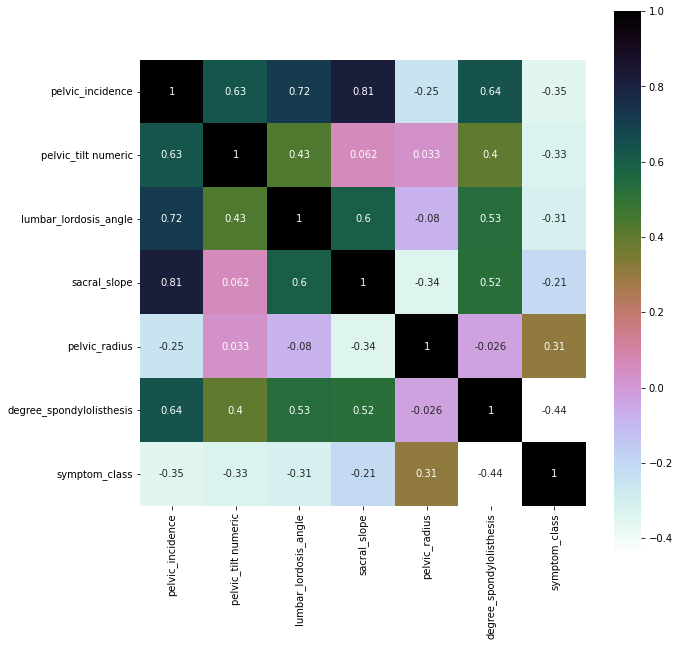

In [92]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, cmap='cubehelix_r',square=True)

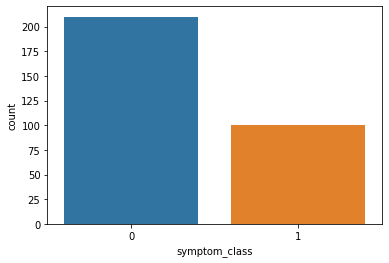

In [109]:
import seaborn as sns
sns.countplot(data['symptom_class'])


#Normalizing Data

Siliting Data Set

In [94]:
x = data.drop(['symptom_class'],axis = 1)
y = data['symptom_class']

Normalizing Data

In [95]:
from sklearn import preprocessing
cols = x.columns
d = preprocessing.normalize(x,axis = 0)
norm_x = pd.DataFrame(d, columns=cols)
norm_x.head()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.056915,0.063446,0.040802,0.051090,0.047226,-0.000315
1,0.035269,0.028304,0.025769,0.036600,0.054756,0.005660
2,0.062156,0.062506,0.051601,0.058838,0.050726,-0.004378
3,0.062576,0.069354,0.045646,0.056352,0.048756,0.013903
4,0.044891,0.027154,0.029170,0.050567,0.051771,0.009820


Training DataSet

In [96]:
from sklearn.model_selection import train_test_split
norm_x_train,norm_x_test,y_train,y_test=train_test_split(norm_x,y,test_size=0.20)


In [97]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20,random_state = 1)

In [98]:
train_norm_x = train.drop(['symptom_class'], axis = 1)
train_y = train['symptom_class']             

test_norm_x = test.drop(['symptom_class'],axis = 1)
test_y = test['symptom_class'] 

In [99]:
print('Dimension of train_x :',train_norm_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_norm_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (248, 6)
Dimension of train_y : (248,)
Dimension of test_x : (62, 6)
Dimension of test_y : (62,)


In [100]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_norm_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [101]:
pred = KNN.predict(test_norm_x)
pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [102]:
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the KNN with K=3 is 83.87%


In [103]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(train_norm_x,train_y)

GaussianNB()

In [104]:
print(test_y)

78     0
244    1
185    0
70     0
120    0
      ..
146    0
9      0
127    0
16     0
206    0
Name: symptom_class, Length: 62, dtype: int64


In [105]:
test_norm_x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
78,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646
244,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870
185,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047
70,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537
120,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327
...,...,...,...,...,...,...
146,85.581710,30.457039,78.231379,55.124672,114.866049,68.376122
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437
127,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250
16,63.834982,20.362507,54.552434,43.472475,112.309491,-0.622527


In [106]:
y_pred=nb.predict(test_norm_x)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0]


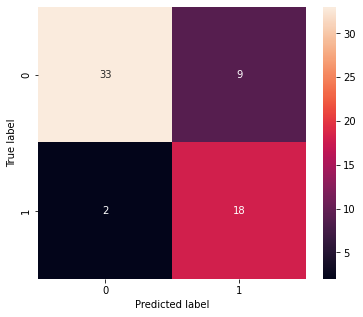

In [107]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [108]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_pred,test_y),2)*100

82.0